# 3150 Final Project
______________________________________________________________
For this project, I'm deciding to package image quality and image analysis into one.  What I'm going to call image quality & analysis.  The goal is simply taking an image and be able to inspect it if you choose and know various metrics about it.  Half of this is about understanding an image's static features as well as getting a feel for quality of the image.  Typically, you'd usually want to reference another image to compare and evaluate against the one you want to assess.  This package is calling on blind reference to evaluate.  What is called BRISQUE, or Blind Image Spatial Quality Evaluator.  

Likewise, for analysis, this is going to provide color identification, a visual saliency (map), ***and finally a RGB threshold finder***.  Color identification is exactly like it sounds.  The code is giving a window where by clicking into an area of interest, gives a color and RGB value of said color. A really nice feature to have and possibly helpful else where down the line if you want to work with color thresholding.  

### Visual saliency: 
Visual saliency is somewhat subjective in nature.  What is something that stands out to one person my not stand out to another.  Regarless this is something that can also have utility, object detection is a classic example of saliency or usually what is salient in an image is often a object, but not always.

### BRISQUE IQA
Blind Image Spatial Quality Evaluator for a image quality assessment is an alogrithm that only uses the image itself to judge or evaluate its quality.  There is a fair bit of math behind this idea; however, this is a simple outline of how it works. You get the original image, then extract the NSS or Natural Scene Statistics, next you calcuate the feature vector, and finally you calculate the prediction score using a SVM, or a Support Vector Machine.  Which is a binary classificaition to distingush two groups and correctly identify them after training.  However, the training has already been completed and is held in the "models" folder.  It is just referenced for BRISQUE scoring.  That is the basic algorithm for this quality assessment.  The steps will be explained in further detail, in the IQA section.
______________________________________________________________

## Basic information & Color Analysis 

The color identification is as it sounds, given an image you can click in a part of the image in situation you are interested in the color of, and get the name and RGB value of said color.

This is also using a dataset, with 865 colors label and corresponding to a RGB value as well.  The code simply opens up an window to allow the user to display the image with the 

In [114]:
print('Type of the image : ' , type(img)) 
print('Shape of the image : {}'.format(img.shape)) 
print('Image Hight {}'.format(img.shape[0])) 
print('Image Width {}'.format(img.shape[1])) 
print('Dimension of Image {}'.format(img.ndim))
print('Image size {}'.format(img.size)) 
print('Maximum RGB value in this image {}'.format(img.max()))
print('Minimum RGB value in this image {}'.format(img.min()))

Type of the image :  <class 'numpy.ndarray'>
Shape of the image : (662, 1000, 3)
Image Hight 662
Image Width 1000
Dimension of Image 3
Image size 1986000
Maximum RGB value in this image 255
Minimum RGB value in this image 0


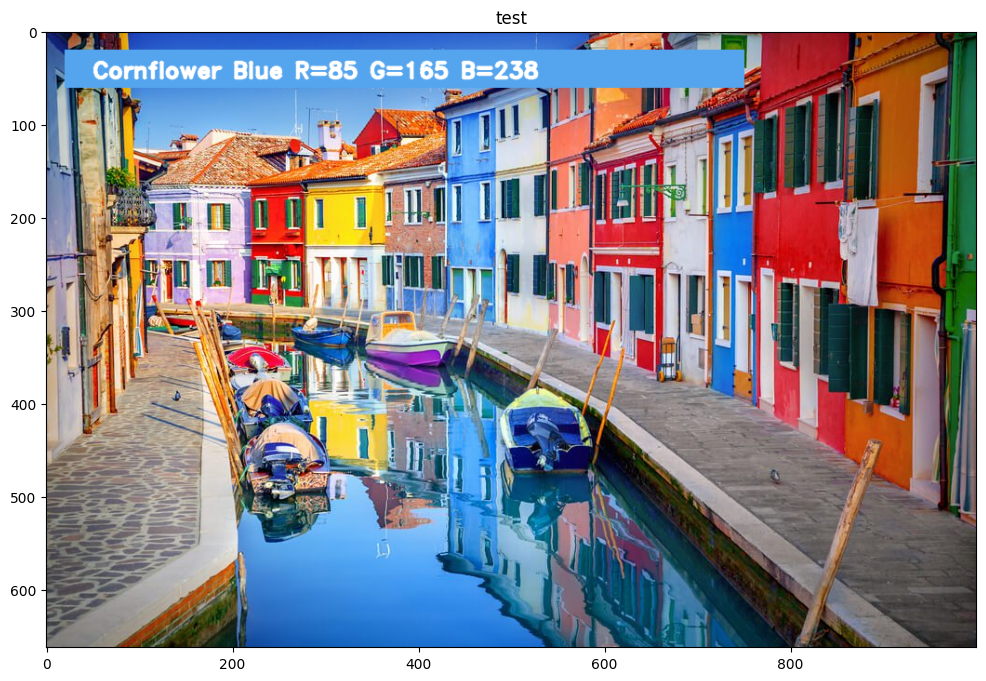

In [65]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt

#//load up the images 
img = cv2.imread("data/colorpic.jpg", cv2.IMREAD_COLOR)
#src1 = cv.imread("/content/mydata/man.jpg", cv.IMREAD_COLOR)
plt.figure()
plt.title('test')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)) 


#declaring global variables (are used later on)
clicked = False
r = g = b = xpos = ypos = 0

#Reading csv file with pandas and giving names to each column
index=["color","color_name","hex","R","G","B"]
csv = pd.read_csv('data/colors.csv', names=index, header=None)

#function to calculate minimum distance from all colors and get the most matching color
def getColorName(R,G,B):
    minimum = 10000
    for i in range(len(csv)):
        d = abs(R- int(csv.loc[i,"R"])) + abs(G- int(csv.loc[i,"G"]))+ abs(B- int(csv.loc[i,"B"]))
        if(d<=minimum):
            minimum = d
            cname = csv.loc[i,"color_name"]
    return cname

#function to get x,y coordinates of mouse double click
def draw_function(event, x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        global b,g,r,xpos,ypos, clicked
        clicked = True
        xpos = x
        ypos = y
        b,g,r = img[y,x]
        b = int(b)
        g = int(g)
        r = int(r)
       
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_function)

while(1):

    cv2.imshow("image",img)
    if (clicked):
   
        #cv2.rectangle(image, startpoint, endpoint, color, thickness)-1 fills entire rectangle 
        cv2.rectangle(img,(20,20), (750,60), (b,g,r), -1)

        #Creating text string to display( Color name and RGB values )
        text = getColorName(r,g,b) + ' R='+ str(r) +  ' G='+ str(g) +  ' B='+ str(b)
        
        #cv2.putText(img,text,start,font(0-7),fontScale,color,thickness,lineType )
        cv2.putText(img, text,(50,50),2,0.8,(255,255,255),2,cv2.LINE_AA)

        #For very light colours we will display text in black colour
        if(r+g+b>=600):
            cv2.putText(img, text,(50,50),2,0.8,(0,0,0),2,cv2.LINE_AA)
            
        clicked=False

    #Break the loop when user hits 'esc' key    
    if cv2.waitKey(20) & 0xFF ==27:
        break
    
cv2.destroyAllWindows()

plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)) 

### View color spectrum of image

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg

from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import extcolors

from colormap import rgb2hex

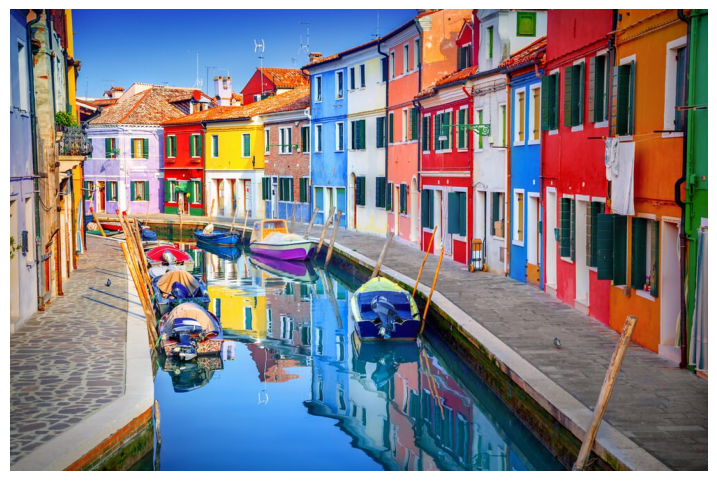

In [108]:
#read
plt.figure(figsize=(9, 9))
img_url = 'data/colorpic.jpg'
img = plt.imread(img_url)
plt.imshow(img)
plt.axis('off')
plt.show()

In [109]:
colors_x = extcolors.extract_from_path(img_url, tolerance = 12, limit = 12)
colors_x

([((136, 126, 125), 70939),
  ((211, 210, 208), 45374),
  ((46, 135, 229), 40606),
  ((173, 164, 165), 29298),
  ((83, 151, 224), 26173),
  ((99, 94, 91), 24992),
  ((4, 47, 64), 18400),
  ((6, 32, 29), 15837),
  ((175, 81, 9), 15605),
  ((199, 177, 153), 14785),
  ((211, 27, 35), 14107),
  ((120, 140, 173), 13228)],
 662000)

In [110]:
colors_dict = {
    "0048BA": "Absolute Zero", "B0BF1A": "Acid green", "7CB9E8": "Aero", "C9FFE5": "Aer o blue", "B284BE": "African violet", "72A0C1": "Air superiority blue", "EDEAE0": "Alabaster", "F0F8FF": "Alice blue", "C46210": "Alloy orange", "EFDECD": "Almond", "E52B50": "Amaranth", "9F2B68": "Amaranth (M&P)", "F19CBB": "Amaranth pink", "AB274F": "Amaranth purple", "D3212D": "Amaranth red", "3B7A57": "Amazon", "FFBF00": "Amber", "FF7E00": "Amber (SAE/ECE)", "9966CC": "Amethyst", "A4C639": "Android green", "CD9575": "Antique brass", "665D1E": "Antique bronze", "915C83": "Antique fuchsia", "841B2D": "Antique ruby", "FAEBD7": "Antique white", "008000": "Ao (English)",
    "8DB600": "Apple green", "FBCEB1": "Apricot", "00FFFF": "Aqua", "7FFFD4": "Aquamarine", "D0FF14": "Arctic lime", "4B5320": "Army green", "8F9779": "Artichoke", "E9D66B": "Arylide yellow", "B2BEB5": "Ash gray", "87A96B": "Asparagus", "FF9966": "Atomic tangerine", "A52A2A": "Auburn", "FDEE00": "Aureolin", "568203": "Avocado", "007FFF": "Azure", "F0FFFF": "Azure (X11/web color)", "89CFF0": "Baby blue", "A1CAF1": "Baby blue eyes", "F4C2C2": "Baby pink", "FEFEFA": "Baby powder", "FF91AF": "Baker-Miller pink", "FAE7B5": "Banana Mania", "DA1884": "Barbie Pink", "7C0A02": "Barn red", "848482": "Battleship grey", "BCD4E6": "Beau blue",
    "9F8170": "Beaver", "F5F5DC": "Beige", "2E5894": "B'dazzled blue", "9C2542": "Big dip o’ruby", "FFE4C4": "Bisque", "3D2B1F": "Bistre", "967117": "Bistre brown", "CAE00D": "Bitter lemon", "BFFF00": "Bitter lime", "FE6F5E": "Bittersweet", "BF4F51": "Bittersweet shimmer", "000000": "Black", "3D0C02": "Black bean", "1B1811": "Black chocolate", "3B2F2F": "Black coffee", "54626F": "Black coral", "3B3C36": "Black olive", "BFAFB2": "Black Shadows", "FFEBCD": "Blanched almond", "A57164": "Blast-off bronze", "318CE7": "Bleu de France", "ACE5EE": "Blizzard blue", "FAF0BE": "Blond", "660000": "Blood red", "0000FF": "Blue", "1F75FE": "Blue (Crayola)",
    "0093AF": "Blue (Munsell)", "0087BD": "Blue (NCS)", "0018A8": "Blue (Pantone)", "333399": "Blue (pigment)", "0247FE": "Blue (RYB)", "A2A2D0": "Blue bell", "6699CC": "Blue-gray", "0D98BA": "Blue-green", "064E40": "Blue-green (color wheel)", "5DADEC": "Blue jeans", "126180": "Blue sapphire", "8A2BE2": "Blue-violet", "7366BD": "Blue-violet (Crayola)", "4D1A7F": "Blue-violet (color wheel)", "5072A7": "Blue yonder", "3C69E7": "Bluetiful", "DE5D83": "Blush", "79443B": "Bole", "E3DAC9": "Bone", "006A4E": "Bottle green", "87413F": "Brandy", "CB4154": "Brick red", "66FF00": "Bright green", "D891EF": "Bright lilac", "C32148": "Bright maroon", "1974D2": "Bright navy blue",
    "FFAA1D": "Bright yellow (Crayola)", "FF55A3": "Brilliant rose", "FB607F": "Brink pink", "004225": "British racing green", "CD7F32": "Bronze", "88540B": "Brown", "AF6E4D": "Brown sugar", "1B4D3E": "Brunswick green", "7BB661": "Bud green", "F0DC82": "Buff", "800020": "Burgundy", "DEB887": "Burlywood", "A17A74": "Burnished brown", "CC5500": "Burnt orange", "E97451": "Burnt sienna", "8A3324": "Burnt umber", "BD33A4": "Byzantine", "702963": "Byzantium", "536872": "Cadet", "5F9EA0": "Cadet blue", "A9B2C3": "Cadet blue (Crayola)", "91A3B0": "Cadet grey", "006B3C": "Cadmium green", "ED872D": "Cadmium orange", "E30022": "Cadmium red", "FFF600": "Cadmium yellow",
    "A67B5B": "Café au lait", "4B3621": "Café noir", "A3C1AD": "Cambridge blue", "C19A6B": "Camel", "EFBBCC": "Cameo pink", "FFFF99": "Canary", "FFEF00": "Canary yellow", "FF0800": "Candy apple red", "E4717A": "Candy pink", "00BFFF": "Capri", "592720": "Caput mortuum", "C41E3A": "Cardinal", "00CC99": "Caribbean green", "960018": "Carmine", "D70040": "Carmine (M&P)", "FFA6C9": "Carnation pink", "B31B1B": "Carnelian", "56A0D3": "Carolina blue", "ED9121": "Carrot orange", "00563F": "Castleton green", "703642": "Catawba", "C95A49": "Cedar Chest", "ACE1AF": "Celadon", "007BA7": "Celadon blue", "2F847C": "Celadon green", "B2FFFF": "Celeste",
    "246BCE": "Celtic blue", "DE3163": "Cerise", "007BA7": "Cerulean", "2A52BE": "Cerulean blue", "6D9BC3": "Cerulean frost", "1DACD6": "Cerulean (Crayola)", "007AA5": "CG blue", "E03C31": "CG red", "F7E7CE": "Champagne", "F1DDCF": "Champagne pink", "36454F": "Charcoal", "232B2B": "Charleston green", "E68FAC": "Charm pink", "DFFF00": "Chartreuse (traditional)", "7FFF00": "Chartreuse (web)", "FFB7C5": "Cherry blossom pink", "954535": "Chestnut", "DE6FA1": "China pink", "A8516E": "China rose", "AA381E": "Chinese red", "856088": "Chinese violet", "FFB200": "Chinese yellow", "7B3F00": "Chocolate (traditional)", "D2691E": "Chocolate (web)", "FFA700": "Chrome yellow", "98817B": "Cinereous",
    "E34234": "Cinnabar", "CD607E": "Cinnamon Satin", "E4D00A": "Citrine", "9FA91F": "Citron", "7F1734": "Claret", "0047AB": "Cobalt blue", "D2691E": "Cocoa brown", "6F4E37": "Coffee", "B9D9EB": "Columbia Blue", "F88379": "Congo pink", "8C92AC": "Cool grey", "B87333": "Copper", "DA8A67": "Copper (Crayola)", "AD6F69": "Copper penny", "CB6D51": "Copper red", "996666": "Copper rose", "FF3800": "Coquelicot", "FF7F50": "Coral", "F88379": "Coral pink", "893F45": "Cordovan", "FBEC5D": "Corn", "6495ED": "Cornflower blue", "FFF8DC": "Cornsilk", "2E2D88": "Cosmic cobalt", "FFF8E7": "Cosmic latte", "81613C": "Coyote brown",
    "FFBCD9": "Cotton candy", "FFFDD0": "Cream", "DC143C": "Crimson", "9E1B32": "Crimson (UA)", "F5F5F5": "Cultured", "00FFFF": "Cyan", "00B7EB": "Cyan (process)", "58427C": "Cyber grape", "FFD300": "Cyber yellow", "F56FA1": "Cyclamen", "666699": "Dark blue-gray", "654321": "Dark brown", "5D3954": "Dark byzantium", "26428B": "Dark cornflower blue", "008B8B": "Dark cyan", "536878": "Dark electric blue", "B8860B": "Dark goldenrod", "013220": "Dark green", "006400": "Dark green (X11)", "1A2421": "Dark jungle green", "BDB76B": "Dark khaki", "483C32": "Dark lava", "534B4F": "Dark liver", "543D37": "Dark liver (horses)", "8B008B": "Dark magenta", "4A5D23": "Dark moss green",
    "556B2F": "Dark olive green", "FF8C00": "Dark orange", "9932CC": "Dark orchid", "03C03C": "Dark pastel green", "301934": "Dark purple", "8B0000": "Dark red", "E9967A": "Dark salmon", "8FBC8F": "Dark sea green", "3C1414": "Dark sienna", "8CBED6": "Dark sky blue", "483D8B": "Dark slate blue", "2F4F4F": "Dark slate gray", "177245": "Dark spring green", "00CED1": "Dark turquoise", "9400D3": "Dark violet", "00703C": "Dartmouth green", "555555": "Davy's grey", "DA3287": "Deep cerise", "FAD6A5": "Deep champagne", "B94E48": "Deep chestnut", "004B49": "Deep jungle green", "FF1493": "Deep pink", "FF9933": "Deep saffron", "00BFFF": "Deep sky blue", "4A646C": "Deep Space Sparkle", "7E5E60": "Deep taupe",
    "1560BD": "Denim", "2243B6": "Denim blue", "C19A6B": "Desert", "EDC9AF": "Desert sand", "696969": "Dim gray", "1E90FF": "Dodger blue", "D71868": "Dogwood rose", "967117": "Drab", "00009C": "Duke blue", "EFDFBB": "Dutch white", "E1A95F": "Earth yellow", "555D50": "Ebony", "C2B280": "Ecru", "1B1B1B": "Eerie black", "614051": "Eggplant", "F0EAD6": "Eggshell", "1034A6": "Egyptian blue", "7DF9FF": "Electric blue", "00FF00": "Electric green", "6F00FF": "Electric indigo", "CCFF00": "Electric lime", "BF00FF": "Electric purple", "8F00FF": "Electric violet", "50C878": "Emerald", "6C3082": "Eminence", "1B4D3E": "English green"}

In [111]:
def color_to_df(input):
    colors_pre_list = str(input).replace('([(','').split(', (')[0:-1]
    df_rgb = [i.split('), ')[0] + ')' for i in colors_pre_list]
    df_percent = [i.split('), ')[1].replace(')','') for i in colors_pre_list]
    
    #convert RGB to HEX code
    df_color_up = [rgb2hex(int(i.split(", ")[0].replace("(","")),
                          int(i.split(", ")[1]),
                          int(i.split(", ")[2].replace(")",""))) for i in df_rgb]
    
    df = pd.DataFrame(zip(df_color_up, df_percent), columns = ['c_code','occurence'])
    return df

df_color = color_to_df(colors_x)
df_color

,c_code,occurence
0,#887E7D,70939
1,#D3D2D0,45374
2,#2E87E5,40606
3,#ADA4A5,29298
4,#5397E0,26173
5,#635E5B,24992
6,#042F40,18400
7,#06201D,15837
8,#AF5109,15605
9,#C7B199,14785


In [112]:
df_color['color_name'] = df_color['c_code'].apply(lambda c: colors_dict.get(c, 'Not Found'))
df_color

,c_code,occurence,color_name
0,#887E7D,70939,Not Found
1,#D3D2D0,45374,Not Found
2,#2E87E5,40606,Not Found
3,#ADA4A5,29298,Not Found
4,#5397E0,26173,Not Found
5,#635E5B,24992,Not Found
6,#042F40,18400,Not Found
7,#06201D,15837,Not Found
8,#AF5109,15605,Not Found
9,#C7B199,14785,Not Found


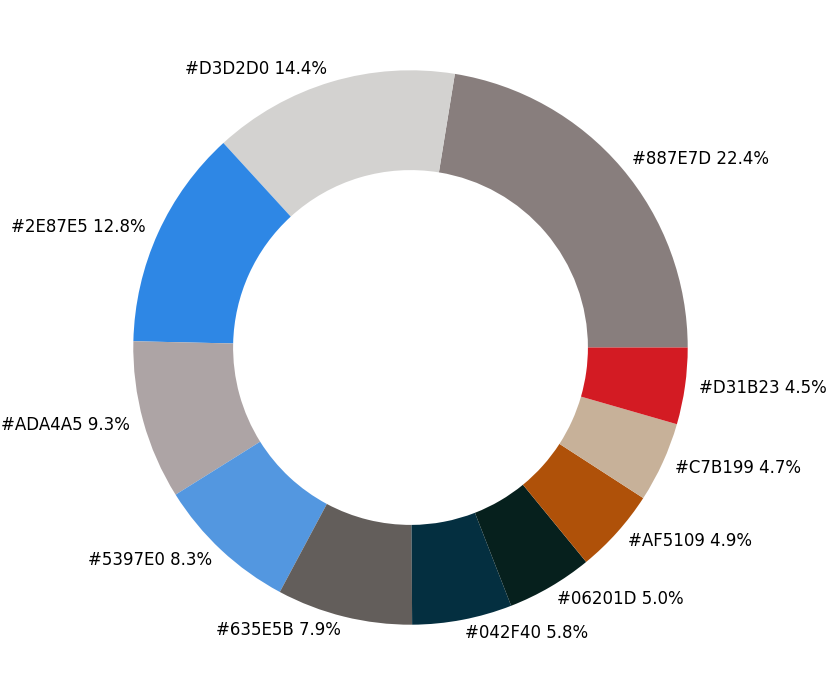

In [113]:
list_color = list(df_color['c_code'])
list_precent = [int(i) for i in list(df_color['occurence'])]
text_c = [c + ' ' + str(round(p*100/sum(list_precent),1)) +'%' for c, p in zip(list_color,
                                                                               list_precent)]
fig, ax = plt.subplots(figsize=(90,90),dpi=10)
wedges, text = ax.pie(list_precent,
                      labels= text_c,
                      labeldistance= 1.05,
                      colors = list_color,
                      textprops={'fontsize': 120, 'color':'black'}
                     )
plt.setp(wedges, width=0.3)

#create space in the center
plt.setp(wedges, width=0.36)

ax.set_aspect("equal")
fig.set_facecolor('white')
plt.show()

__________________________________________________________________________________

## Visual Saliency

Text(0.5, 1.0, 'salient area')

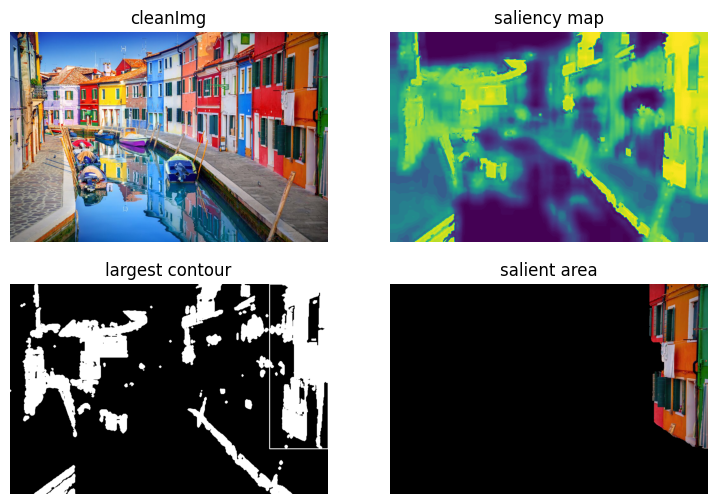

In [73]:
import cv2
import matplotlib.pyplot as plt
import time
import numpy as np

#//load up the images 
img = cv2.imread("data/colorpic.jpg", cv2.IMREAD_COLOR)

cleanImg = img.copy()

#src1 = cv.imread("/content/mydata/man.jpg", cv.IMREAD_COLOR)
# plt.figure()
# plt.title('Original')
# plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)) 

meanOfImg = cv2.pyrMeanShiftFiltering(img, 2, 10, img, 4)

# plt.figure()
# plt.title('mean Shift')
# plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))


def backproject(source, target, levels = 2, scale = 1):
        hsv = cv2.cvtColor(source,  cv2.COLOR_BGR2HSV)
        hsvt = cv2.cvtColor(target, cv2.COLOR_BGR2HSV)
        # calculating object histogram
        roihist = cv2.calcHist([hsv],[0, 1], None, \
            [levels, levels], [0, 180, 0, 256] )

        # normalize histogram and apply backprojection
        cv2.normalize(roihist,roihist,0,255,cv2.NORM_MINMAX)
        dst = cv2.calcBackProject([hsvt],[0,1],roihist,[0,180,0,256], scale)
        return dst

backproj = np.uint8(backproject(img, img, levels = 2))

# plt.figure()
# plt.title('backproj')
# plt.imshow(cv2.cvtColor(backproj,cv2.COLOR_BGR2RGB))

cv2.normalize(backproj,backproj,0,255,cv2.NORM_MINMAX)
saliencies = [backproj, backproj, backproj]
saliency = cv2.merge(saliencies)
cv2.pyrMeanShiftFiltering(saliency, 20, 200, saliency, 2)
saliency = cv2.cvtColor(saliency, cv2.COLOR_BGR2GRAY)
saliency = (255-saliency)
cv2.equalizeHist(saliency, saliency)

# plt.figure()
# plt.title('saliency')
# plt.imshow(cv2.cvtColor(saliency,cv2.COLOR_BGR2RGB))

(T, threshold) = cv2.threshold(saliency, 200, 255, cv2.THRESH_BINARY)

# plt.figure()
# plt.title('threshold')
# plt.imshow(cv2.cvtColor(threshold,cv2.COLOR_BGR2RGB))

contours, hierarchy = cv2.findContours(threshold,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)

if len(contours) !=0:
    cv2.drawContours(threshold,contours, -1, 255, 3)
    # find the biggest countour (c) by the area
    c = max(contours, key = cv2.contourArea)
    x,y,w,h = cv2.boundingRect(c)
    # draw the biggest contour (c) in green
    maskBack = cv2.rectangle(threshold,(x,y),(x+w,y+h),(255,255,255),2)

# plt.figure()
# plt.title('contours')
# plt.imshow(cv2.cvtColor(threshold,cv2.COLOR_BGR2RGB))

mask = np.zeros(img.shape[:2],np.uint8)
rect = (x,y,w,h)
bgdmodel = np.zeros((1, 65),np.float64)
fgdmodel = np.zeros((1, 65),np.float64)
# saliency[np.where(saliency > 0)] = cv2.GC_FGD
# mask = saliency
cv2.grabCut(cleanImg, mask, rect, bgdmodel, fgdmodel, \
            1, cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
salientImg = cleanImg*mask2[:,:,np.newaxis]

# plt.figure()
# plt.title('salienct object')
# plt.imshow(cv2.cvtColor(salientImg,cv2.COLOR_BGR2RGB))


# fig, ax = plt.subplots(1,3)
# plt.figure(figsize=(8,8))
# ax[0].imshow(cv2.cvtColor(cleanImg,cv2.COLOR_BGR2RGB))
# ax[1].imshow(saliency)
# ax[2].imshow(cv2.cvtColor(salientImg,cv2.COLOR_BGR2RGB))

# create figure
fig = plt.figure(figsize=(9, 6))

# setting values to rows and column variables
rows = 2
columns = 2

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)

# showing image
plt.imshow(cv2.cvtColor(cleanImg,cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("cleanImg")

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)

# showing image
plt.imshow(saliency)
plt.axis('off')
plt.title("saliency map")

# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)

# showing image
plt.imshow(cv2.cvtColor(threshold,cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("largest contour")

# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)

# showing image
plt.imshow(cv2.cvtColor(salientImg,cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("salient area")

# Image quality assessment

In [76]:
import collections
from itertools import chain
import urllib.request as request
import pickle 

import numpy as np

import scipy.signal as signal
import scipy.special as special
import scipy.optimize as optimize

import matplotlib.pyplot as plt

import skimage.io
import skimage.transform

import cv2

from libsvm import svmutil

In [ ]:
def normalize_kernel(kernel):
    return kernel / np.sum(kernel)

def gaussian_kernel2d(n, sigma):
    Y, X = np.indices((n, n)) - int(n/2)
    gaussian_kernel = 1 / (2 * np.pi * sigma ** 2) * np.exp(-(X ** 2 + Y ** 2) / (2 * sigma ** 2)) 
    return normalize_kernel(gaussian_kernel)

def local_mean(image, kernel):
    return signal.convolve2d(image, kernel, 'same')

In [ ]:
def local_deviation(image, local_mean, kernel):
    "Vectorized approximation of local deviation"
    sigma = image ** 2
    sigma = signal.convolve2d(sigma, kernel, 'same')
    return np.sqrt(np.abs(local_mean ** 2 - sigma))

In [ ]:
def calculate_mscn_coefficients(image, kernel_size=6, sigma=7/6):
    C = 1/255
    kernel = gaussian_kernel2d(kernel_size, sigma=sigma)
    local_mean = signal.convolve2d(image, kernel, 'same')
    local_var = local_deviation(image, local_mean, kernel)
    
    return (image - local_mean) / (local_var + C)

In [ ]:
def generalized_gaussian_dist(x, alpha, sigma):
    beta = sigma * np.sqrt(special.gamma(1 / alpha) / special.gamma(3 / alpha))
    
    coefficient = alpha / (2 * beta() * special.gamma(1 / alpha))
    return coefficient * np.exp(-(np.abs(x) / beta) ** alpha)

In [ ]:
def calculate_pair_product_coefficients(mscn_coefficients):
    return collections.OrderedDict({
        'mscn': mscn_coefficients,
        'horizontal': mscn_coefficients[:, :-1] * mscn_coefficients[:, 1:],
        'vertical': mscn_coefficients[:-1, :] * mscn_coefficients[1:, :],
        'main_diagonal': mscn_coefficients[:-1, :-1] * mscn_coefficients[1:, 1:],
        'secondary_diagonal': mscn_coefficients[1:, :-1] * mscn_coefficients[:-1, 1:]
    })

In [ ]:
def asymmetric_generalized_gaussian(x, nu, sigma_l, sigma_r):
    def beta(sigma):
        return sigma * np.sqrt(special.gamma(1 / nu) / special.gamma(3 / nu))
    
    coefficient = nu / ((beta(sigma_l) + beta(sigma_r)) * special.gamma(1 / nu))
    f = lambda x, sigma: coefficient * np.exp(-(x / beta(sigma)) ** nu)
        
    return np.where(x < 0, f(-x, sigma_l), f(x, sigma_r))

In [ ]:
def asymmetric_generalized_gaussian_fit(x):
    def estimate_phi(alpha):
        numerator = special.gamma(2 / alpha) ** 2
        denominator = special.gamma(1 / alpha) * special.gamma(3 / alpha)
        return numerator / denominator

    def estimate_r_hat(x):
        size = np.prod(x.shape)
        return (np.sum(np.abs(x)) / size) ** 2 / (np.sum(x ** 2) / size)

    def estimate_R_hat(r_hat, gamma):
        numerator = (gamma ** 3 + 1) * (gamma + 1)
        denominator = (gamma ** 2 + 1) ** 2
        return r_hat * numerator / denominator

    def mean_squares_sum(x, filter = lambda z: z == z):
        filtered_values = x[filter(x)]
        squares_sum = np.sum(filtered_values ** 2)
        return squares_sum / ((filtered_values.shape))

    def estimate_gamma(x):
        left_squares = mean_squares_sum(x, lambda z: z < 0)
        right_squares = mean_squares_sum(x, lambda z: z >= 0)

        return np.sqrt(left_squares) / np.sqrt(right_squares)

    def estimate_alpha(x):
        r_hat = estimate_r_hat(x)
        gamma = estimate_gamma(x)
        R_hat = estimate_R_hat(r_hat, gamma)

        solution = optimize.root(lambda z: estimate_phi(z) - R_hat, [0.2]).x

        return solution[0]

    def estimate_sigma(x, alpha, filter = lambda z: z < 0):
        return np.sqrt(mean_squares_sum(x, filter))
    
    def estimate_mean(alpha, sigma_l, sigma_r):
        return (sigma_r - sigma_l) * constant * (special.gamma(2 / alpha) / special.gamma(1 / alpha))
    
    alpha = estimate_alpha(x)
    sigma_l = estimate_sigma(x, alpha, lambda z: z < 0)
    sigma_r = estimate_sigma(x, alpha, lambda z: z >= 0)
    
    constant = np.sqrt(special.gamma(1 / alpha) / special.gamma(3 / alpha))
    mean = estimate_mean(alpha, sigma_l, sigma_r)
    
    return alpha, mean, sigma_l, sigma_r

In [ ]:
def calculate_brisque_features(image, kernel_size=7, sigma=7/6):
    def calculate_features(coefficients_name, coefficients, accum=np.array([])):
        alpha, mean, sigma_l, sigma_r = asymmetric_generalized_gaussian_fit(coefficients)

        if coefficients_name == 'mscn':
            var = (sigma_l ** 2 + sigma_r ** 2) / 2
            return [alpha, var]
        
        return [alpha, mean, sigma_l ** 2, sigma_r ** 2]
    
    mscn_coefficients = calculate_mscn_coefficients(image, kernel_size, sigma)
    coefficients = calculate_pair_product_coefficients(mscn_coefficients)
    
    features = [calculate_features(name, coeff) for name, coeff in coefficients.items()]
    flatten_features = list(chain.from_iterable(features))
    return np.array(flatten_features)

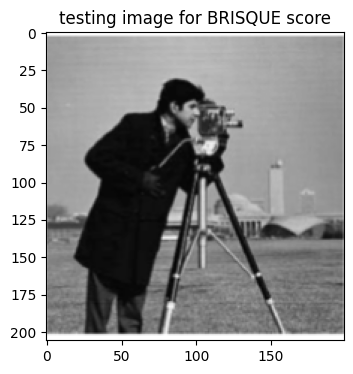

In [239]:
## display image as a reference

BrisqueImg = cv2.imread("data/clean_test_Img.png", cv2.IMREAD_COLOR)
plt.figure()
plt.title('testing image for BRISQUE score')
plt.imshow(cv2.cvtColor(BrisqueImg,cv2.COLOR_BGR2RGB)) 


In [240]:
def load_image(url):
    image = cv2.imread("data/clean_test_Img.png", cv2.IMREAD_COLOR)
    return skimage.io.imread(image, plugin='pil')

In [241]:
def plot_histogram(x, label):
    n, bins = np.histogram(x.ravel(), bins=50)
    n = n / np.max(n)
    plt.plot(bins[:-1], n, label=label, marker='o')

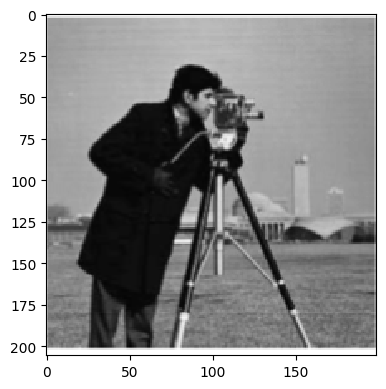

In [242]:
%matplotlib inline
plt.rcParams["figure.figsize"] = 4, 4

image = cv2.imread("data/clean_test_Img.png", cv2.IMREAD_COLOR)
gray_image = skimage.color.rgb2gray(image)

_ = skimage.io.imshow(gray_image)

In [243]:
%%time 

mscn_coefficients = calculate_mscn_coefficients(gray_image, 7, 7/6)
coefficients = calculate_pair_product_coefficients(mscn_coefficients)

CPU times: user 25 ms, sys: 111 µs, total: 25.1 ms
Wall time: 25.2 ms


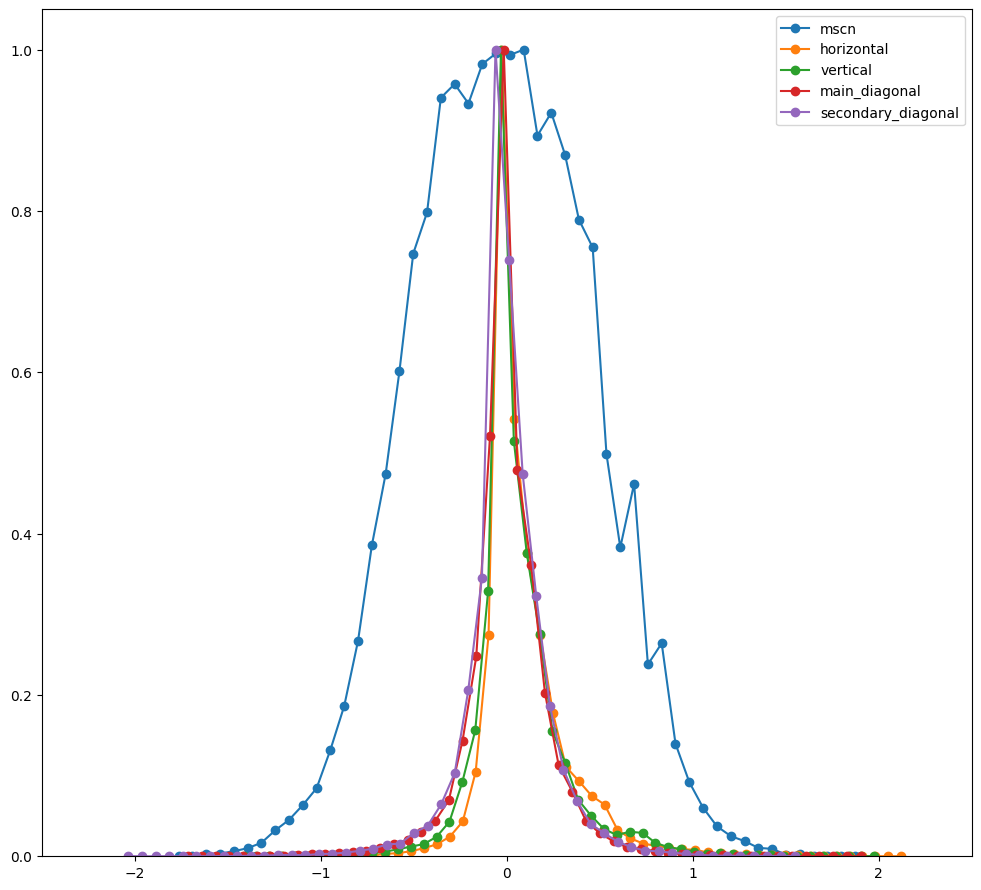

In [244]:
%matplotlib inline
plt.rcParams["figure.figsize"] = 12, 11

for name, coeff in coefficients.items():
    plot_histogram(coeff.ravel(), name)

plt.axis([-2.5, 2.5, 0, 1.05])
plt.legend()
plt.show()

In [245]:
%%time 

brisque_features = calculate_brisque_features(gray_image, kernel_size=7, sigma=7/6)

CPU times: user 35.2 ms, sys: 0 ns, total: 35.2 ms
Wall time: 45.3 ms


/tmp/ipykernel_83452/2662786004.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(flatten_features)


In [246]:
%%time

downscaled_image = cv2.resize(gray_image, None, fx=1/2, fy=1/2, interpolation = cv2.INTER_CUBIC)
downscale_brisque_features = calculate_brisque_features(downscaled_image, kernel_size=7, sigma=7/6)

brisque_features = np.concatenate((brisque_features, downscale_brisque_features))
print(brisque_features)

[2.4297738111353087 array([0.21438807]) 0.7473485000255412
 array([0.101296]) array([0.01902088]) array([0.08640221])
 0.7221343443564583 array([0.07213779]) array([0.02917827])
 array([0.08023706]) 0.7440247681619607 array([0.00870885])
 array([0.04495637]) array([0.05083395]) 0.7529857833196162
 array([0.00582764]) array([0.0454981]) array([0.04939786])
 2.333547443550819 array([0.30649694]) 0.6999373994755776
 array([0.0437066]) array([0.09371169]) array([0.14063961])
 0.6957632375791114 array([0.03199898]) array([0.10202728])
 array([0.13687668]) 0.7033536907098492 array([-0.04331108])
 array([0.12698744]) array([0.08306012]) 0.7314669450097886
 array([-0.05893102]) array([0.12963565]) array([0.07214787])]
CPU times: user 18.9 ms, sys: 0 ns, total: 18.9 ms
Wall time: 18.4 ms


/tmp/ipykernel_83452/2662786004.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(flatten_features)


In [247]:
def scale_features(features):
    with open('models/normalize.pickle', 'rb') as handle:
        scale_params = pickle.load(handle)
    
    min_ = np.array(scale_params['min_'])
    max_ = np.array(scale_params['max_'])
    
    return -1 + (2.0 / (max_ - min_) * (features - min_))

def calculate_image_quality_score(brisque_features):
    model = svmutil.svm_load_model('models/brisque_svm.txt')
    scaled_brisque_features = scale_features(brisque_features)
    
    x, idx = svmutil.gen_svm_nodearray(
        scaled_brisque_features,
        isKernel=(model.param.kernel_type == svmutil.PRECOMPUTED))
    
    nr_classifier = 1
    prob_estimates = (svmutil.c_double * nr_classifier)()
    
    return svmutil.libsvm.svm_predict_probability(model, x, prob_estimates)

In [249]:
%%time

calculate_image_quality_score(brisque_features)

CPU times: user 3.52 ms, sys: 8 ms, total: 11.5 ms
Wall time: 9.85 ms


17.30084587419978

## Sources

https://towardsdatascience.com/image-data-analysis-using-python-edddfdf128f4

https://github.com/ocampor/notebooks/blob/master/notebooks/image/quality/brisque.ipynb

https://stackoverflow.com/questions/44588279/find-and-draw-the-largest-contour-in-opencv-on-a-specific-color-python

https://jacobgil.github.io/computervision/saliency-from-backproj

https://docs.opencv.org/3.4/d8/d83/tutorial_py_grabcut.html

https://towardsdatascience.com/image-color-extraction-with-python-in-4-steps-8d9370d9216e